In [1]:
import pandas as pd
from sklearn.cluster import SpectralBiclustering
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import consensus_score

In [9]:
%matplotlib inline

In [16]:
# Load the data
df = pd.read_csv('testfile_2023-11-11-14:49:07_random_forest', header = 0, usecols=range(num_columns - 1))  # Adjust the path as needed

In [18]:
matrix = df.values

In [19]:
rows = [row for row in matrix]
columns = [matrix[:, i] for i in range(matrix.shape[1])]
# Get the number of rows and columns
num_rows, num_columns = matrix.shape

# row indices
row_idx = np.arange(num_rows)

# column indices
col_idx = np.arange(num_columns)

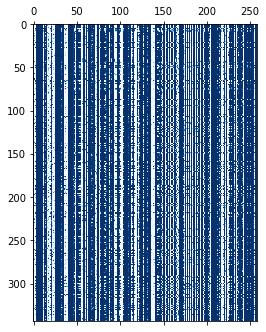

In [21]:
plt.matshow(matrix, cmap=plt.cm.Blues)

In [22]:
model = SpectralBiclustering(n_clusters=2, random_state=0)
model.fit(matrix)

SpectralBiclustering(n_clusters=2, random_state=0)

In [23]:
rows_labels = model.row_labels_
columns_labels = model.column_labels_

In [24]:
fit_matrix = matrix[np.argsort(rows_labels)]
fit_matrix = fit_matrix[:,np.argsort(columns_labels)]

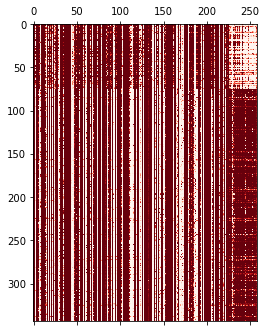

In [25]:
plt.matshow(fit_matrix, cmap=plt.cm.Reds)

In [26]:
for cluster_num in range(2):  # Assuming you have 2 clusters
    # Find rows and columns in this cluster
    rows_in_cluster = np.where(rows_labels == cluster_num)[0]
    columns_in_cluster = np.where(columns_labels == cluster_num)[0]

    print(f"Cluster {cluster_num}:")
    print(f"Rows: {rows_in_cluster}")
    print(f"Columns: {columns_in_cluster}")

    # If you want to see the data in this cluster
    cluster_data = matrix[np.ix_(rows_in_cluster, columns_in_cluster)]
    print(f"Data in Cluster {cluster_num}:\n{cluster_data}\n")

Cluster 0:
Rows: [  6   7   8   9  22  26  28  33  45  49  50  51  59  63  66  67  69  71
  75  85  88  95 100 107 108 114 119 121 125 131 138 139 141 149 159 164
 165 167 171 180 187 188 191 192 196 199 208 210 218 219 223 235 238 246
 253 261 262 266 268 273 278 292 293 297 300 304 306 308 313 316 325 326
 328 330 332 336]
Columns: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  27  28  29  30  31  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  48  49  50  51  55  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  78  79
  80  81  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 121 123 124 125 126 127 128 129 130 132 133 134 135 136 137 138 139
 140 141 142 145 146 147 149 150 151 152 154 155 156 157 158 161 162 163
 164 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 18

In [29]:
columns_in_first_cluster = columns_in_cluster = np.where(columns_labels == 0)[0]
columns_in_second_cluster = columns_in_cluster = np.where(columns_labels == 1)[0]

from proto_drop_vis import visualize_topk_dropped
import os

cwd = os.getcwd()

proto_dropped  = columns_in_first_cluster
proto_kept = columns_in_second_cluster
LOG_DIR = os.path.join(cwd, "runs/plankton_biclustering_258_protos")
PATH_TRAINED_MODEL =  os.path.join(cwd, "runs/plankton_258_protos/checkpoints/net_trained_60")
to_sample = 10

In [30]:
visualize_topk_dropped(proto_dropped, proto_kept, LOG_DIR, PATH_TRAINED_MODEL, 'biclustering_protos_258', k=10, to_sample=to_sample, num_features=258)

CUDA device set without id specification
Device used:  cuda with id [0]
Number of prototypes set from 768 to 258 . Extra 1x1 conv layer added. Not recommended.
chosen network is convnext
Pretrained network loaded
Num classes (k) =  86 ['Amphidinium_sp', 'Asterionellopsis', 'Cerataulina', 'Cerataulina_flagellate', 'Ceratium'] etc.
Visualizing prototypes for topk...


/sw/arch/RHEL8/EB_production/2022/software/PyTorch/1.12.0-foss-2022a-CUDA-11.7.0/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(

0 prototypes do not have any similarity score > 0.1. Will be ignored in visualisation.



Visualizing topk: 100% 3096/3096 [00:37<00:00, 81.53it/s]

Abstained:  0
